# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 




## Load data

In [2]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv') 
df_users = pd.read_csv('/datasets/megaline_users.csv')  

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
print("Summary of df_plans:")
print(df_plans.info())

Summary of df_plans:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Print a sample of data for plans

print("\nSample of df_plans:")
print(df_plans.sample(2)) 


Sample of df_plans:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?] 

In the data above I have combed through the sample of the dataframe and have not recongnized that their is any inappropriate data types. One thing I may clean up is how the columns include underscores which may need to be filtered out depending on what information I am going to process to make it look cleaner. 

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [5]:
print("\nMissing values in df_plans:")
print(df_plans.isnull().sum())

print("\nDuplicate rows in df_plans:")
print(df_plans.duplicated().sum())

df_plans.drop_duplicates(inplace=True)
print("\nData types in df_plans:")
print(df_plans.dtypes)

df_plans.rename(columns={'plan_name': 'plan'}, inplace=True) 

if 'monthly_fee' in df_plans.columns:
    df_plans['annual_fee'] = df_plans['monthly_fee'] * 12
    
    print("\nEnriched df_plans:")
print(df_plans.head())




Missing values in df_plans:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Duplicate rows in df_plans:
0

Data types in df_plans:
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute      plan  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0

## Users

In [6]:
# Print the general/summary information about the users' DataFrame

print("\nSummary of df_users:")
print(df_users.info())

print("\nSample of df_users:")
print(df_users.head())  



Summary of df_users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Sample of df_users:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA 

In [7]:
# Print a sample of data for users

print("\nSample of df_users:")
print(df_users.head())


Sample of df_users:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I recongized that in the churn_date column it provides output of NaN. I will provide code to fix that so that the proper output is visible and removes the NaN from the dataframe. I will also add code for consistency making sure duplicate names don't appear more then once in the dataframe which could hinder findings in the data.   

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [8]:
print("\nMissing values in df_users:")
print(df_users.isnull().sum())

print("\nDuplicate rows in df_users:")
print(df_users.duplicated().sum())

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] =pd.to_datetime(df_users['churn_date']) 
    
    


 


 




Missing values in df_users:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Duplicate rows in df_users:
0


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [9]:
df_users['user_status'] = df_users['churn_date'].apply(lambda x: 'Churned' if pd.notna(x) else 'Active')
print("\nEnriched df_users:")
print(df_users.head())


Enriched df_users:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date user_status  
0 2018-12-24  ultimate        NaT      Active  
1 2018-08-13      surf        NaT      Active  
2 2018-10-21      surf        NaT      Active  
3 2018-01-28      surf        NaT      Active  
4 2018-05-23      surf        NaT      Active  


## Calls

In [10]:
# Print the general/summary information about the calls' DataFrame

print("\nSummary of df_calls:")
print(df_calls.info())




Summary of df_calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [11]:
# Print a sample of data for calls

print("\nSample of df_calls:")
print(df_calls.head())


Sample of df_calls:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?] 

I reconginzed in the data that the duration column wasn't an integer so i will will convert that data, I will make sure there's not any duplicates, and that their are no missing values. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [12]:
print("\nMissing values in df_calls:")
print(df_calls.isnull().sum())

df_calls.drop_duplicates(inplace=True)

if 'call_date' in df_calls.columns:
    df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
    df_calls['month'] = df_calls['call_date'].dt.to_period('M')
    
df_calls['duration'] = np.ceil(df_calls['duration'])     


Missing values in df_calls:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [13]:
df_calls.duplicated().sum()
df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1
df_calls.drop_duplicates(inplace=True)

df_calls.info()

print(df_calls.sample(10))  
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 6.3+ MB
              id  user_id  call_date  duration    month
98078   1352_377     1352 2018-09-25       1.0  2018-09
1653     1009_75     1009 2018-09-19       1.0  2018-09
60495    1219_22     1219 2018-12-28       3.0  2018-12
8114     1039_54     1039 2018-07-22      11.0  2018-07
112979  1397_700     1397 2018-08-07       2.0  2018-08
62183   1223_356     1223 2018-09-06       1.0  2018-09
128214  1460_280     1460 2018-08-24      26.0  2018-08
27764    11

Hello reviewer, I chose to change the duration from 0 to 1 because even if you are on a call even if it's for 30 seconds it is most likely charged to a minute rather then 0 which would mean that their is no call being made.  

## Messages

In [14]:
# Print the general/summary information about the messages' DataFrame

print("\nSummary of df_messages:")
print(df_messages.info())





Summary of df_messages:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [15]:
# Print a sample of data for messages

print("\nSample of df_messages:")
print(df_messages.head()) 



Sample of df_messages:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I ran a few codes in the next cell that could help find any duplicates and creating a datetime for the df_messages dataframe. I also will enrich the data by seperating message dates into different categories to know when users may use messages more and less. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [16]:
df_messages.drop_duplicates(inplace=True)

if 'date' in df_messages.columns:
    df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
    df_messages['month'] = df_messages['message_date'].dt.to_period('M')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [17]:
# Print the general/summary information about the internet DataFrame

print("\nSummary of df_internet:")
print(df_internet.info())




Summary of df_internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [18]:
# Print a sample of data for the internet traffic

print("\nSample of df_internet:")
print(df_internet.head())


Sample of df_internet:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I notice that their is two id columns with different names. I am going to drop one of those so it doesnt mess with the data. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [19]:
df_internet.drop_duplicates(inplace=True)

if 'date' in df_internet.columns:
    df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
    df_internet['month'] = df_internet['session_date'].dt.to_period('M')


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [20]:
# Print out the plan conditions and make sure they are clear for you

print(df_calls.sample(10)) 

              id  user_id  call_date  duration    month
86737   1320_406     1320 2018-05-31       9.0  2018-05
132971  1479_541     1479 2018-11-28       3.0  2018-11
112300   1396_11     1396 2018-09-28      11.0  2018-09
80421    1291_21     1291 2018-11-28      13.0  2018-11
95850   1340_200     1340 2018-11-15       1.0  2018-11
38944   1145_191     1145 2018-12-09       5.0  2018-12
51185   1185_223     1185 2018-04-25       1.0  2018-04
24345   1091_113     1091 2018-11-23       1.0  2018-11
91290    1329_61     1329 2018-09-02       5.0  2018-09
18567   1071_389     1071 2018-10-12       9.0  2018-10


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [21]:
# Calculate the number of calls made by each user per month. Save the result.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce')
df_calls['month'] = df_calls['call_date'].dt.month

print(df_calls.head()) 


calls_per_user = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_user.rename(columns={'id': 'num_calls'}, inplace=True)
print("\nCalls per user per month:")
print(calls_per_user.head())

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27       9.0     12
1  1000_145     1000 2018-12-27      14.0     12
2  1000_247     1000 2018-12-27      15.0     12
3  1000_309     1000 2018-12-28       6.0     12
4  1000_380     1000 2018-12-30       5.0     12

Calls per user per month:
   user_id  month  num_calls
0     1000     12         16
1     1001      8         27
2     1001      9         49
3     1001     10         65
4     1001     11         64


In [22]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_user = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_user.rename(columns={'duration': 'total_minutes'}, inplace=True)
print("\nMinutes per user per month:")
print(minutes_per_user.head())


Minutes per user per month:
   user_id  month  total_minutes
0     1000     12          124.0
1     1001      8          187.0
2     1001      9          326.0
3     1001     10          411.0
4     1001     11          441.0


In [23]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors='coerce') 
df_messages['month'] = df_messages['message_date'].dt.month 

messages_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user.rename(columns={'id': 'num_messages'}, inplace=True)
print("\nMessages per user per month:")
print(messages_per_user.head())


Messages per user per month:
   user_id  month  num_messages
0     1000     12            11
1     1001      8            30
2     1001      9            44
3     1001     10            53
4     1001     11            36


In [24]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce') 
df_internet['month'] = df_internet['session_date'].dt.month 


internet_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user.rename(columns={'mb_used': 'total_internet'}, inplace=True)
print("\nInternet usage per user per month:")
print(internet_per_user.head())


Internet usage per user per month:
   user_id  month  total_internet
0     1000     12         1901.47
1     1001      8         6919.15
2     1001      9        13314.82
3     1001     10        22330.49
4     1001     11        18504.30


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [25]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
user_usage = calls_per_user.merge(minutes_per_user, on=['user_id', 'month'], how='outer') \
                           .merge(messages_per_user, on=['user_id', 'month'], how='outer') \
                           .merge(internet_per_user, on=['user_id', 'month'], how='outer')
user_usage.fillna(0, inplace=True) 
print("\nMerged user usage data:")

user_usage = user_usage.merge(df_users[['user_id', 'plan', 'city']], on='user_id', how='left')

print(user_usage.head())



Merged user usage data:
   user_id  month  num_calls  total_minutes  num_messages  total_internet  \
0     1000     12       16.0          124.0          11.0         1901.47   
1     1001      8       27.0          187.0          30.0         6919.15   
2     1001      9       49.0          326.0          44.0        13314.82   
3     1001     10       65.0          411.0          53.0        22330.49   
4     1001     11       64.0          441.0          36.0        18504.30   

       plan                                   city  
0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA  
1      surf        Seattle-Tacoma-Bellevue, WA MSA  
2      surf        Seattle-Tacoma-Bellevue, WA MSA  
3      surf        Seattle-Tacoma-Bellevue, WA MSA  
4      surf        Seattle-Tacoma-Bellevue, WA MSA  


In [26]:
#Add the plan information 
columns_to_drop = [col for col in user_usage.columns if col.endswith('_x') or col.endswith('_y')]
user_usage.drop(columns=columns_to_drop, inplace=True)

#user_usage = user_usage.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
user_usage = user_usage.merge(df_plans, on='plan', how='left')
print("\nUser usage data with plan info:")


print(user_usage.head()) 







User usage data with plan info:
   user_id  month  num_calls  total_minutes  num_messages  total_internet  \
0     1000     12       16.0          124.0          11.0         1901.47   
1     1001      8       27.0          187.0          30.0         6919.15   
2     1001      9       49.0          326.0          44.0        13314.82   
3     1001     10       65.0          411.0          53.0        22330.49   
4     1001     11       64.0          441.0          36.0        18504.30   

       plan                                   city  messages_included  \
0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   
2      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   
3      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   
4      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   

   mb_per_month_included  minutes_included  usd_monthly_pay  usd_

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.] 



*********In the cell below I have to run it a few times in order for it to give the correct output. I don't know what is causing the error but once ran more then once and running the above all cells it works perfecty. When you do it as you will see will be an error message, then columns with _x or _y at the end of the code and then once ran again you will see the correct output. I have tried to debug it several different ways but I get the same outcome. 

In [27]:
# Calculate the monthly revenue for each user
#columns_to_drop = [col for col in user_usage.columns if col.endswith('_x') or col.endswith('_y')]
#user_usage.drop(columns=columns_to_drop, inplace=True)



#user_usage = user_usage.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
#user_usage = user_usage.merge(df_plans, on='plan', how='left')
print("\nUser usage data with plan info:")
print(user_usage.head()) 


    
user_usage['monthly_revenue'] = user_usage['usd_monthly_pay'] + \
       ((user_usage['total_minutes'] - user_usage['minutes_included']).clip(lower=0) * user_usage['usd_per_minute']) + \
       ((user_usage['num_messages'] - user_usage['messages_included']).clip(lower=0) * user_usage['usd_per_message']) + \
       ((user_usage['total_internet'] - user_usage['mb_per_month_included']).clip(lower=0) / 1024 * user_usage['usd_per_gb'])





print(user_usage[['user_id', 'monthly_revenue']].head())   






User usage data with plan info:
   user_id  month  num_calls  total_minutes  num_messages  total_internet  \
0     1000     12       16.0          124.0          11.0         1901.47   
1     1001      8       27.0          187.0          30.0         6919.15   
2     1001      9       49.0          326.0          44.0        13314.82   
3     1001     10       65.0          411.0          53.0        22330.49   
4     1001     11       64.0          441.0          36.0        18504.30   

       plan                                   city  messages_included  \
0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   
2      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   
3      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   
4      surf        Seattle-Tacoma-Bellevue, WA MSA                 50   

   mb_per_month_included  minutes_included  usd_monthly_pay  usd_

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [28]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_call_duration = user_usage.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

print(avg_call_duration) 

        plan  month  total_minutes
0       surf      1     209.000000
1       surf      2     304.555556
2       surf      3     338.565217
3       surf      4     360.720000
4       surf      5     410.558442
5       surf      6     442.577320
6       surf      7     462.107438
7       surf      8     421.500000
8       surf      9     425.582474
9       surf     10     441.502110
10      surf     11     434.653710
11      surf     12     486.481132
12  ultimate      1     200.250000
13  ultimate      2     414.142857
14  ultimate      3     313.666667
15  ultimate      4     345.333333
16  ultimate      5     417.862069
17  ultimate      6     380.978723
18  ultimate      7     438.406780
19  ultimate      8     433.507042
20  ultimate      9     449.627907
21  ultimate     10     463.500000
22  ultimate     11     457.606299
23  ultimate     12     471.860927


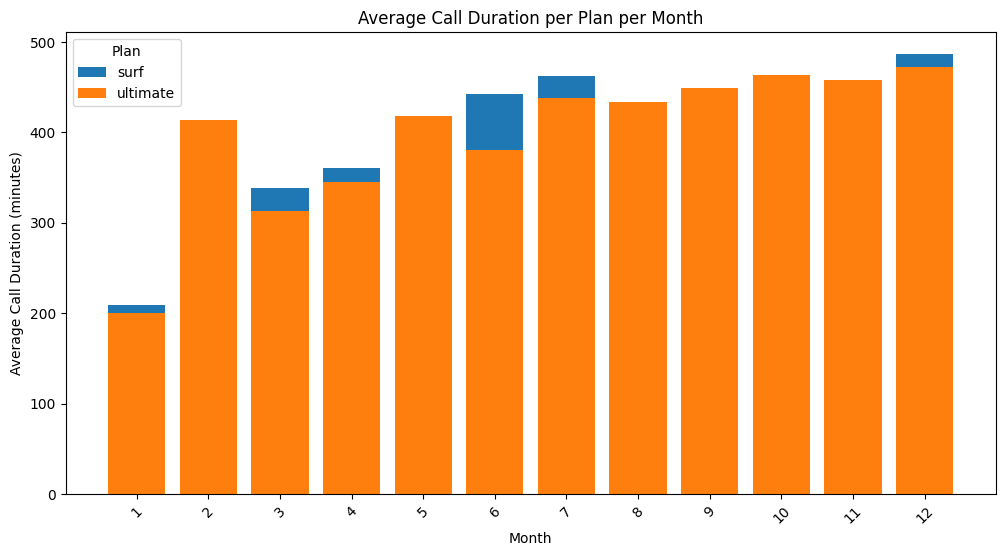

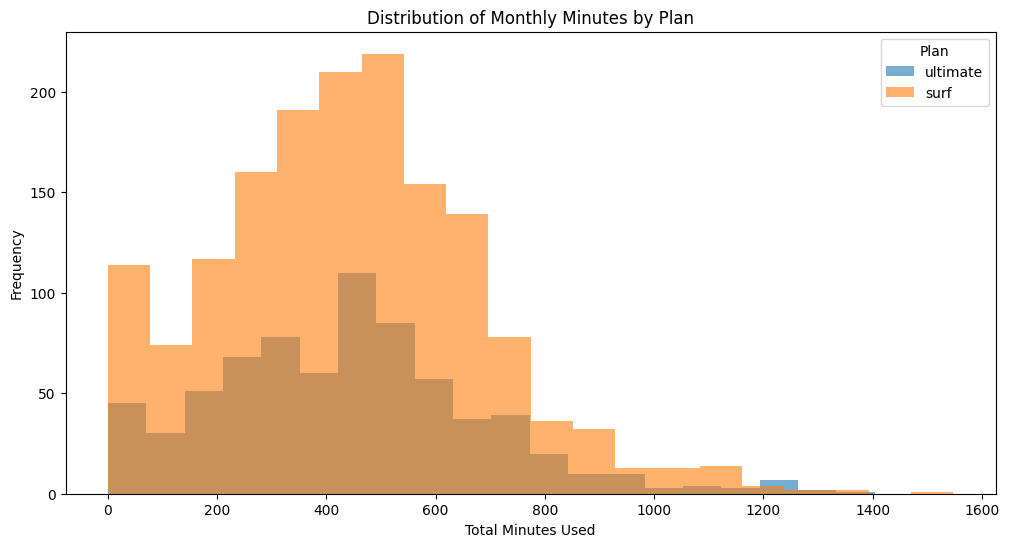

In [29]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

plt.figure(figsize=(12, 6))
for plan in avg_call_duration['plan'].unique():
    plan_data = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.bar(plan_data['month'].astype(str), plan_data['total_minutes'], label=plan) 
    plt.title("Average Call Duration per Plan per Month")
plt.xlabel("Month")
plt.ylabel("Average Call Duration (minutes)")
plt.legend(title="Plan")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
for plan in user_usage['plan'].unique():
    plan_data = user_usage[user_usage['plan'] == plan]
    plt.hist(plan_data['total_minutes'], bins=20, alpha=0.6, label=plan)

plt.title("Distribution of Monthly Minutes by Plan")
plt.xlabel("Total Minutes Used")
plt.ylabel("Frequency")
plt.legend(title="Plan")
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [30]:
# Calculate the mean and the variance of the monthly call duration
mean_duration = user_usage['total_minutes'].mean() 
 
print("Mean Monthly Call Duration:", mean_duration) 



Mean Monthly Call Duration: 440.98604448320975


In [31]:
variance_duration = user_usage['total_minutes'].var() 
print("Variance Monthly Call Duration:", variance_duration)

Variance Monthly Call Duration: 58702.10102679907


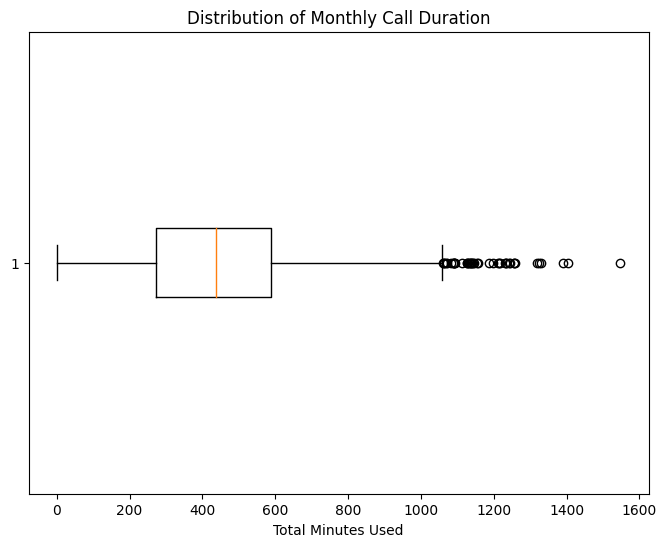

In [32]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(8, 6))
plt.boxplot(user_usage['total_minutes'].dropna(), vert=False)
plt.title("Distribution of Monthly Call Duration")
plt.xlabel("Total Minutes Used")
plt.show()


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?] From the data I can conclude that the mean call duration is 440.98604448320975 and the variance monthly call duration is 58702.10102679907 

### Messages

       plan  num_messages
0      surf     31.159568
1  ultimate     37.551389


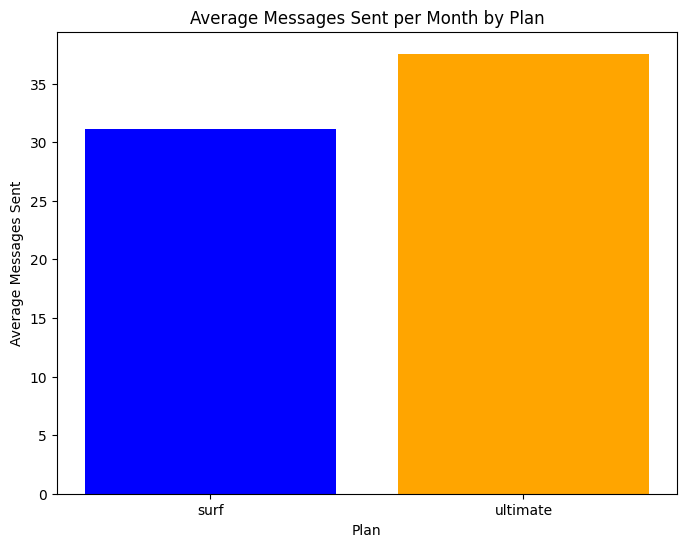

In [33]:
# Compare the number of messages users of each plan tend to send each month
avg_messages = user_usage.groupby('plan')['num_messages'].mean().reset_index()
print(avg_messages)

plt.figure(figsize=(8, 6))
plt.bar(avg_messages['plan'], avg_messages['num_messages'], color=['blue', 'orange'])
plt.title("Average Messages Sent per Month by Plan")
plt.xlabel("Plan")
plt.ylabel("Average Messages Sent")
plt.show()

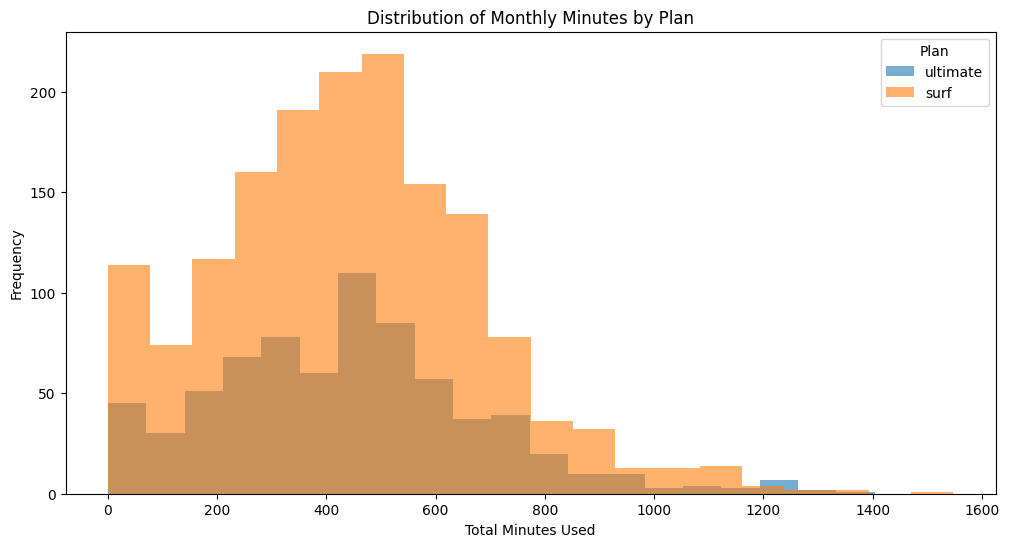

In [34]:
# Compare the amount of internet traffic consumed by users per plan



plt.figure(figsize=(12, 6))
for plan in user_usage['plan'].unique():
    plan_data = user_usage[user_usage['plan'] == plan]
    plt.hist(plan_data['total_minutes'], bins=20, alpha=0.6, label=plan)

plt.title("Distribution of Monthly Minutes by Plan")
plt.xlabel("Total Minutes Used")
plt.ylabel("Frequency")
plt.legend(title="Plan")
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?] In the data I can conclude that the surf plan was used more frequently for longer duration compared to the ultimate plan. 

### Internet

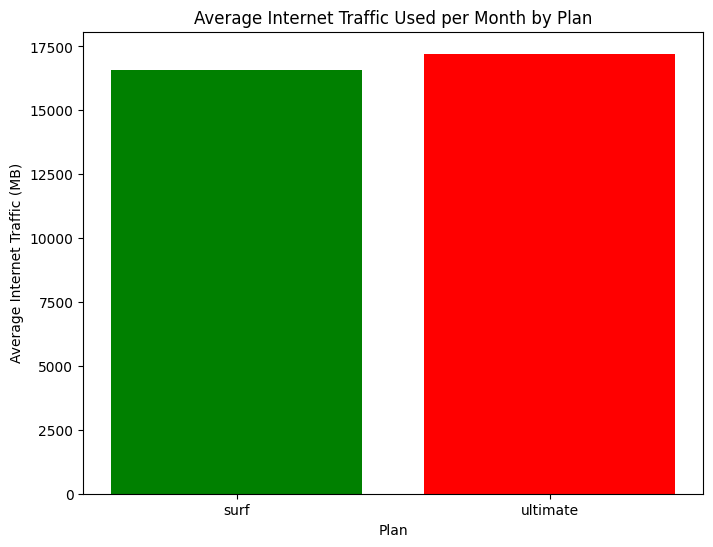

In [35]:
avg_internet = user_usage.groupby('plan')['total_internet'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(avg_internet['plan'], avg_internet['total_internet'], color=['green', 'red'])
plt.title("Average Internet Traffic Used per Month by Plan")
plt.xlabel("Plan")
plt.ylabel("Average Internet Traffic (MB)")
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?] 

based on the conclusions drawn by the graphs the ultimate plan generates more internet traffic 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

Revenue Statistics by Plan:
           count       mean        std   min   25%        50%        75%  \
plan                                                                       
surf      1573.0  57.865491  53.927985  20.0  20.0  37.678906  77.172852   
ultimate   720.0  72.116080  10.768848  70.0  70.0  70.000000  70.000000   

                 max  
plan                  
surf      583.961309  
ultimate  178.522764  


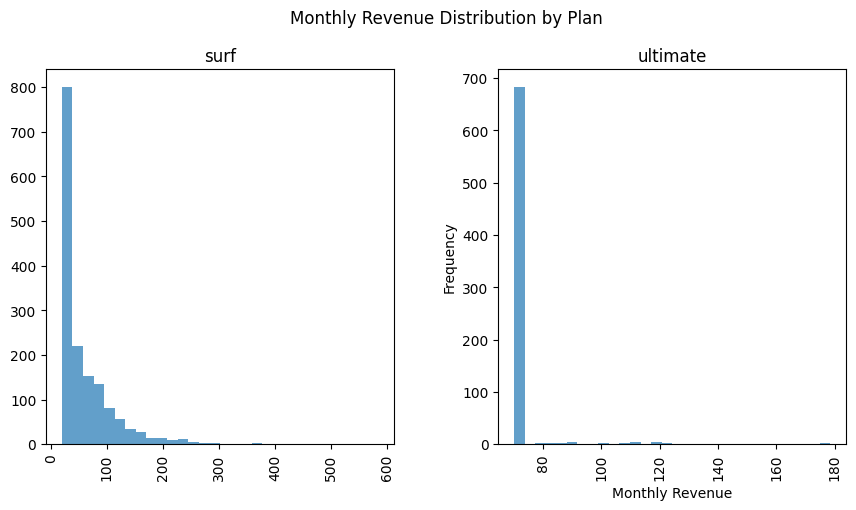

In [36]:
revenue_stats = user_usage.groupby('plan')['monthly_revenue'].describe()
print("Revenue Statistics by Plan:")
print(revenue_stats) 

user_usage.hist(column='monthly_revenue', by='plan', bins=30, figsize=(10, 5), grid=False, alpha=0.7)
plt.suptitle('Monthly Revenue Distribution by Plan', y=1.02)
plt.xlabel('Monthly Revenue') 
plt.ylabel('Frequency') 
plt.show() 

[Formulate conclusions about how the revenue differs between the plans.] I can conclude from the data that the surf plan generates more revenue. 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [37]:
# Test the hypotheses

from scipy.stats import ttest_ind


ultimate_revenue = user_usage[user_usage['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = user_usage[user_usage['plan'] == 'surf']['monthly_revenue']

print("Ultimate Plan Revenue Count:", len(ultimate_revenue))
print("Surf Plan Revenue Count:", len(surf_revenue))


alpha = 0.05
t_stat, p_value = ttest_ind(ultimate_revenue, surf_revenue, equal_var=False, nan_policy='omit')



if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference in revenue.")

Ultimate Plan Revenue Count: 720
Surf Plan Revenue Count: 1573
Reject the null hypothesis: There is a significant difference in revenue.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [38]:
# Test the hypotheses

df_users['region'] = df_users['city'].apply(lambda x: 'NY-NJ' if x in ['NY', 'NJ'] else 'Other')

ny_nj_revenue = user_usage[user_usage['city'].str.contains("NY-NJ", na=False)]['monthly_revenue']
other_revenue = user_usage[~user_usage['city'].str.contains("NY-NJ", na=False)]['monthly_revenue']

t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print("T-Test Results for Revenue by Region:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference in revenue.")


T-Test Results for Revenue by Region:
T-Statistic: -2.315516701862053
P-Value: 0.020940608424208265
Reject the null hypothesis: There is a significant difference in revenue.


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

The conclusions that I have drawn from this project have been that on average users of  the surf plan make longer make longer calls compared to the ultimate plan users. I can conclude that messaging behaviors shows trends across months. From the conclusions configured in the above data concludes that even though the surf plan is more used in certain areas of usage it doesn't conclude that it is the best plan overall. 